# Q4

import the libraries

In [111]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

read both images and plot them

(-0.5, 1023.5, 1023.5, -0.5)

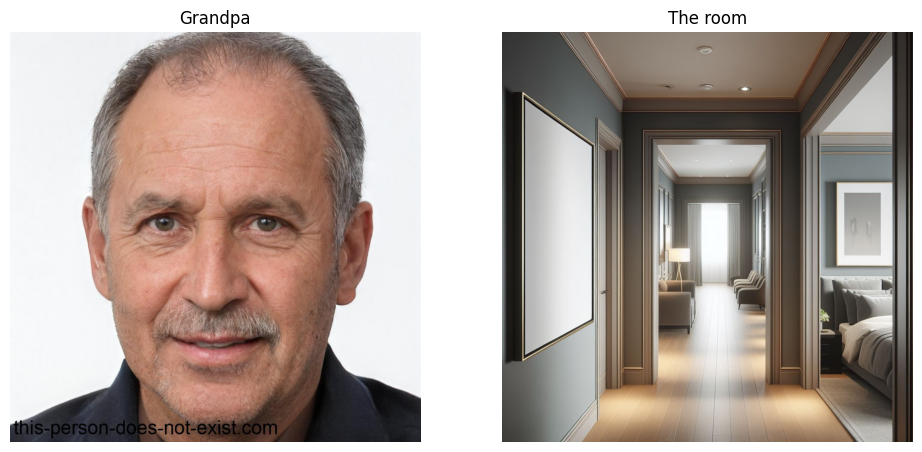

In [112]:
# Read grandpa image and convert from BGR to RGB
image1 = cv2.imread('images/q4_grandpa.jpeg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Read room image and convert from BGR to RGB
image2 = cv2.imread('images/q4_room.jpeg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.title('Grandpa')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.title('The room')
plt.axis('off')

add black ribbon to grandpa image

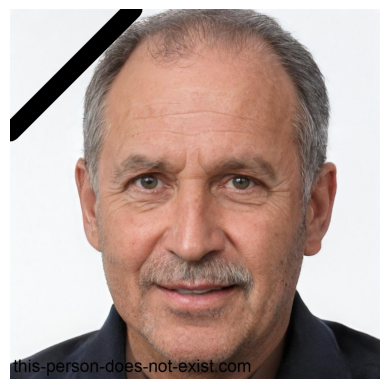

In [113]:
output_image = image1.copy()

# Define the ribbon's thickness
ribbon_thickness = 50

# Define start and end points for the ribbon
start_point = (0, output_image.shape[0] // 3)
end_point = (output_image.shape[1] // 3, 0)

# Draw the ribbon
cv2.line(
    output_image,
    start_point,
    end_point,
    (0, 0, 0),  # Black color
    ribbon_thickness  # Line thickness
)

# Save the result image to a file
output_filename = "images/grandpa_with_ribbon.jpeg"  # You can specify any file name and format
cv2.imwrite(output_filename, cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR))  # OpenCV saves in BGR format

# Display the resulting image
plt.imshow(output_image)
plt.axis('off')
plt.show()


define the coordinates of destination image

In [114]:
final_image = output_image.copy()

# Manually specify the coordinates of the four corners of the frame on the base image
frame_points = np.array([
    [60, 170],  # Top-left
    [220, 290],  # Top-right
    [220, 710],  # Bottom-right
    [60, 800],  # Bottom-left
], dtype=np.float32)

# Get the original dimensions of the grandpa image
overlay_height, overlay_width, _ = final_image.shape

# Define the original frame's coordinates (full size)
original_points = np.array([
    [0, 0],  # Top-left
    [overlay_width, 0],  # Top-right
    [overlay_width, overlay_height],  # Bottom-right
    [0, overlay_height],  # Bottom-left
], dtype=np.float32)

get the transform matrix

In [115]:
# Compute the transformation matrix
transformation_matrix = cv2.getPerspectiveTransform(original_points, frame_points)

apply the transform and plot the result

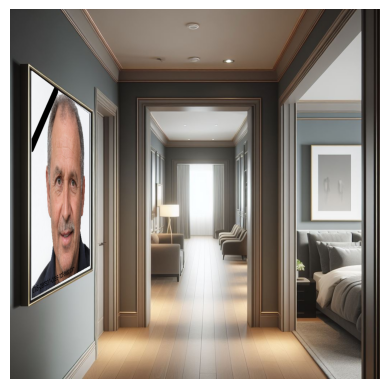

In [116]:
# Apply the transformation to the overlay image
transformed_overlay = cv2.warpPerspective(final_image, transformation_matrix, (image2.shape[1], image2.shape[0]))

# Create a mask to determine where to overlay the transformed image
overlay_mask = np.zeros_like(image2)
cv2.fillPoly(overlay_mask, [frame_points.astype(np.int32)], (255, 255, 255))

# Use the mask to overlay the transformed image onto the background
final_image = cv2.bitwise_and(image2, cv2.bitwise_not(overlay_mask))  # Clear the region for the overlay
final_image = cv2.bitwise_or(final_image, transformed_overlay)  # Overlay the transformed image

# Display the resulting image
plt.imshow(final_image)
plt.axis('off')
plt.show()
